In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
my_graph = nx.Graph()
my_graph.add_node(1)
my_graph.add_nodes_from([2, 3])
my_graph.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])
print(my_graph)

Graph with 5 nodes and 0 edges


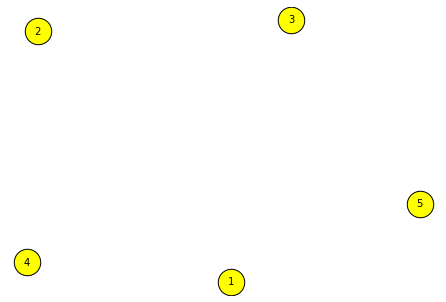

In [4]:
draw_options = {
    "font_size": 10,
    "node_size": 700,
    "node_color": "yellow",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
    "with_labels": True
}
nx.draw(my_graph, **draw_options)

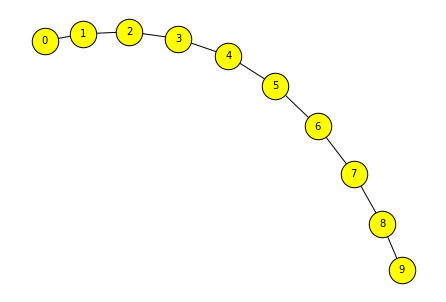

In [5]:
graph_other = nx.path_graph(10)
nx.draw(graph_other,  **draw_options)

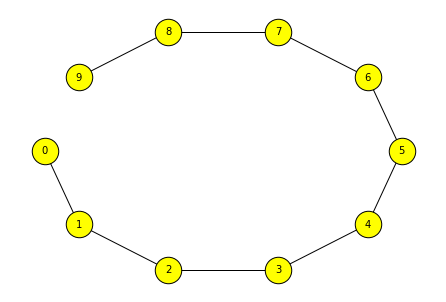

In [6]:
nx.draw_shell(graph_other, **draw_options)

[(1, 2), (1, 3), (2, 3)]


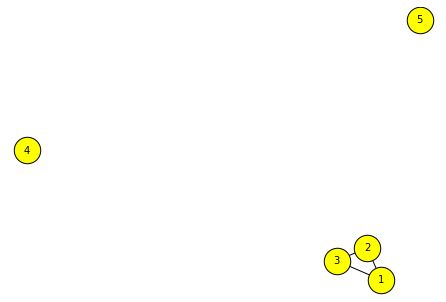

In [7]:
my_graph.add_edge(1, 2)
e = (2, 3)
my_graph.add_edge(*e)

my_graph.add_edges_from([(1, 2), (1, 3),(2, 3, {'weight': 3.1415})])
print(list(my_graph.edges))
nx.draw(my_graph,  **draw_options)

In [8]:
my_graph.clear()

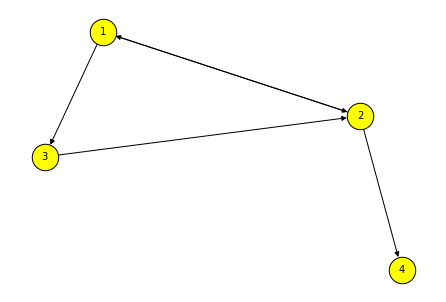

In [9]:
G = nx.DiGraph()
G.add_edge(2, 1)   # adds the nodes in order 2, 1
G.add_edge(1, 3)
G.add_edge(2, 4)
G.add_edge(1, 2)
G.add_edge(3, 2)
nx.draw(G,  **draw_options)


In [10]:
print(list(G.nodes))
print(list(G.edges))
print(list(G.neighbors(1))) 
print(G.out_degree[1])  # the number of edges exiting 1
print(G.in_degree[1])   # the number of edges entering 1
print(G.degree[1])      # the number of edges incident to 1

[2, 1, 3, 4]
[(2, 1), (2, 4), (1, 3), (1, 2), (3, 2)]
[3, 2]
2
1
3


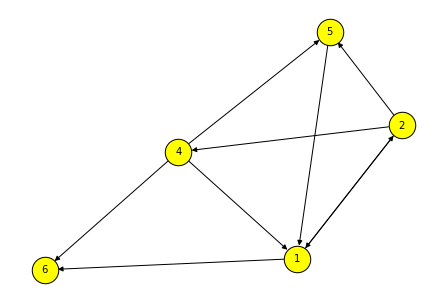

In [11]:

G.add_edge(4,1)
G.add_edge(4,5)
G.add_edge(5,1)
G.add_edge(2,5)
G.add_edge(6,5)
G.add_edge(1,6)
G.add_edge(3,5)
G.add_edge(4,6)
G.remove_node(3)
G.remove_edge(6, 5)
nx.draw(G,  **draw_options)

In [12]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
pos = nx.spring_layout(FG)
print(pos)

{1: array([0.99168165, 0.11414581]), 2: array([-1.        ,  0.57323061]), 3: array([ 0.56041872, -0.66545171]), 4: array([-0.55210037, -0.02192472])}


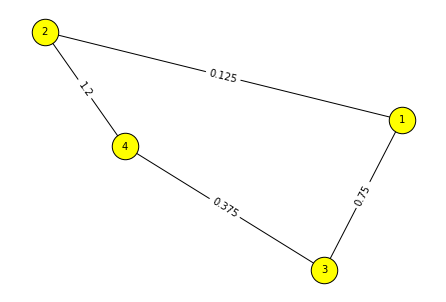

In [13]:
nx.draw(FG,pos, **draw_options)
nx.draw_networkx_edge_labels(FG, pos, edge_labels=nx.get_edge_attributes(FG,'weight'));

## Generate random graph

G graph:
node1 = 0, node2 = 3 , weight = 0.875
node1 = 0, node2 = 7 , weight = 0.585
node1 = 1, node2 = 2 , weight = 0.729
node1 = 1, node2 = 3 , weight = 0.486
node1 = 1, node2 = 4 , weight = 0.00896
node1 = 1, node2 = 5 , weight = 0.515
node1 = 1, node2 = 6 , weight = 0.799
node1 = 1, node2 = 7 , weight = 0.967
node1 = 2, node2 = 3 , weight = 0.145
node1 = 2, node2 = 4 , weight = 0.629
node1 = 2, node2 = 5 , weight = 0.619
node1 = 2, node2 = 6 , weight = 0.668
node1 = 3, node2 = 4 , weight = 0.24
node1 = 3, node2 = 5 , weight = 0.311
node1 = 3, node2 = 6 , weight = 0.559
node1 = 3, node2 = 7 , weight = 0.314
node1 = 3, node2 = 9 , weight = 0.486
node1 = 4, node2 = 5 , weight = 0.849
node1 = 5, node2 = 6 , weight = 0.359
node1 = 5, node2 = 7 , weight = 0.573
node1 = 5, node2 = 8 , weight = 0.978
node1 = 7, node2 = 9 , weight = 0.454
node1 = 8, node2 = 9 , weight = 0.38


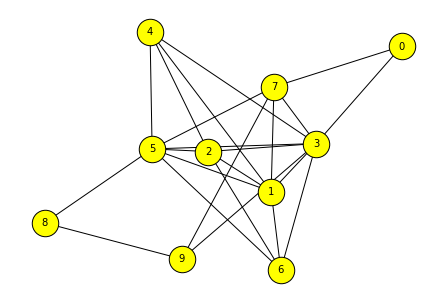

In [14]:
def print_graph(G):
    for u,v,attr in G.edges.data('weight'):
        print(f'node1 = {u}, node2 = {v} , weight = {attr:.3}')

def random_weighted_graph(num_of_nodes, probability_of_edge):
    G = nx.gnp_random_graph(num_of_nodes, probability_of_edge)  
    for (u, v) in G.edges():
        G.edges[u,v]['weight'] = np.random.random()
    return G

G = random_weighted_graph(10,0.3)
print("G graph:")
print_graph(G)
nx.draw(G,  **draw_options)



H graph:
node1 = 0, node2 = 4 , weight = 0.189
node1 = 1, node2 = 2 , weight = 0.725
node1 = 1, node2 = 3 , weight = 0.584
node1 = 1, node2 = 7 , weight = 0.376
node1 = 2, node2 = 7 , weight = 0.945
node1 = 3, node2 = 7 , weight = 0.0588
node1 = 3, node2 = 8 , weight = 0.465
node1 = 3, node2 = 9 , weight = 0.364
node1 = 4, node2 = 5 , weight = 0.471
node1 = 6, node2 = 7 , weight = 0.0692
node1 = 6, node2 = 8 , weight = 0.409


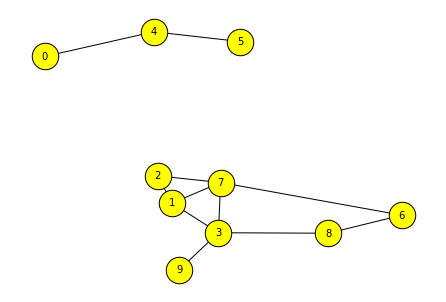

In [15]:
H = random_weighted_graph(10, 0.3)  # create graph with 10 nodes; probability of each edge is 0.3
print("\nH graph:")
print_graph(H)
nx.draw(H,  **draw_options)

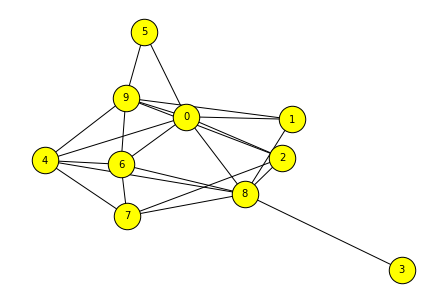

In [16]:
GC = nx.complement(G)  # every non-edge becomes an edge and vice-versa
nx.draw(GC,  **draw_options)

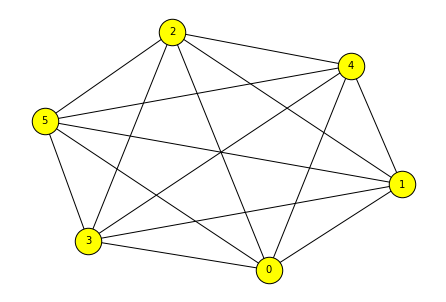

In [17]:
K_6 = nx.complete_graph(6)                  # Returns the complete graph K_n with n nodes.
nx.draw(K_6,  **draw_options)

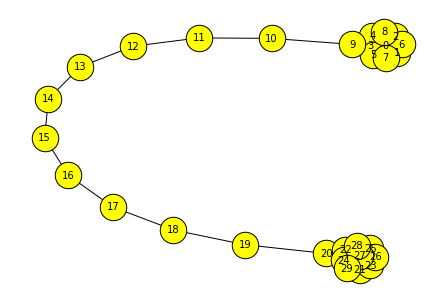

In [18]:
barbell = nx.barbell_graph(10, 10)          # Returns the Barbell Graph: two complete graphs connected by a path.
nx.draw(barbell,  **draw_options)

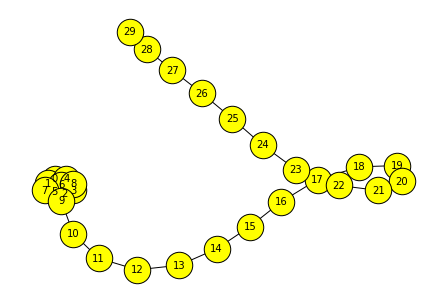

In [19]:

lollipop = nx.lollipop_graph(10, 20)        # Returns the Lollipop Graph; K_m connected to P_n.
nx.draw(lollipop,  **draw_options)

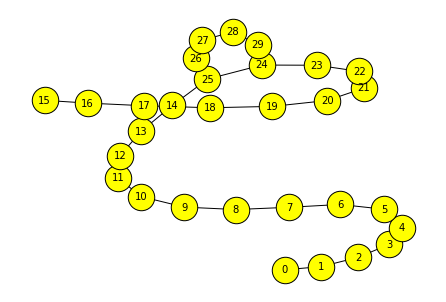

In [20]:
ws = nx.watts_strogatz_graph(30, 3, 0.1)    # Returns a Watts–Strogatz small-world graph.
nx.draw(ws,  **draw_options)

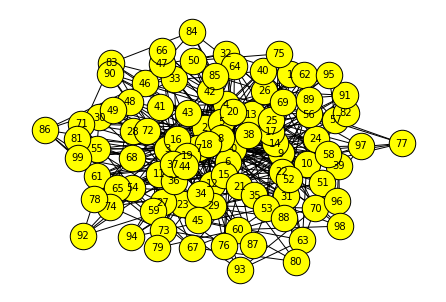

In [21]:
ba = nx.barabasi_albert_graph(100, 5)       # Returns a random graph according to the Barabási–Albert preferential attachment model.
nx.draw(ba,  **draw_options)

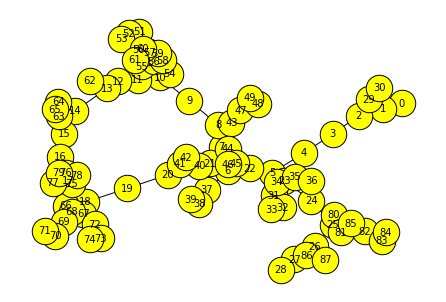

In [22]:
red = nx.random_lobster(20, 0.5, 0.5)      # Returns a random lobster graph.
nx.draw(red,  **draw_options)

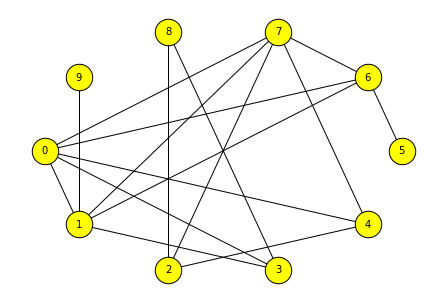

In [23]:
size = 10
G = random_weighted_graph(size, 0.4) 
nx.draw_shell(G, **draw_options)

## Graph algorithms

In [24]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# shortest paths and path lengths between nodes in the graph.
# These algorithms work with undirected and directed graphs
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
source = 0
target = size -1
print('~~~shortest path~~~')
print(nx.shortest_path(G)) # returns dictionary of shortest paths
print(nx.has_path(G, source, target)) # boolean


~~~shortest path~~~
{0: {0: [0], 1: [0, 1], 3: [0, 3], 4: [0, 4], 6: [0, 6], 7: [0, 7], 9: [0, 1, 9], 8: [0, 3, 8], 2: [0, 4, 2], 5: [0, 6, 5]}, 1: {1: [1], 0: [1, 0], 3: [1, 3], 6: [1, 6], 7: [1, 7], 9: [1, 9], 4: [1, 0, 4], 8: [1, 3, 8], 5: [1, 6, 5], 2: [1, 7, 2]}, 2: {2: [2], 4: [2, 4], 7: [2, 7], 8: [2, 8], 0: [2, 4, 0], 1: [2, 7, 1], 6: [2, 7, 6], 3: [2, 8, 3], 9: [2, 7, 1, 9], 5: [2, 7, 6, 5]}, 3: {3: [3], 0: [3, 0], 1: [3, 1], 8: [3, 8], 4: [3, 0, 4], 6: [3, 0, 6], 7: [3, 0, 7], 9: [3, 1, 9], 2: [3, 8, 2], 5: [3, 0, 6, 5]}, 4: {4: [4], 0: [4, 0], 2: [4, 2], 7: [4, 7], 1: [4, 0, 1], 3: [4, 0, 3], 6: [4, 0, 6], 8: [4, 2, 8], 9: [4, 0, 1, 9], 5: [4, 0, 6, 5]}, 5: {5: [5], 6: [5, 6], 0: [5, 6, 0], 1: [5, 6, 1], 7: [5, 6, 7], 3: [5, 6, 0, 3], 4: [5, 6, 0, 4], 9: [5, 6, 1, 9], 2: [5, 6, 7, 2], 8: [5, 6, 0, 3, 8]}, 6: {6: [6], 0: [6, 0], 1: [6, 1], 5: [6, 5], 7: [6, 7], 3: [6, 0, 3], 4: [6, 0, 4], 9: [6, 1, 9], 2: [6, 7, 2], 8: [6, 0, 3, 8]}, 7: {7: [7], 0: [7, 0], 1: [7, 1], 2: [7, 2

In [25]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Shortest path algorithms for weighted graphs.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
print('\n~~~weighted graph~~~')
#dijkstra
print(nx.dijkstra_predecessor_and_distance(G, source)) # returns dictionary of shortest path 
print(nx.dijkstra_path(G, source, target ))  # returns list
# Floyd Warshall
print(nx.floyd_warshall_numpy(G)) # returns a numpy array



~~~weighted graph~~~
({0: [], 1: [7], 3: [0], 4: [7], 6: [0], 7: [0], 2: [7], 9: [1], 5: [6], 8: [2]}, {0: 0, 7: 0.03795160315694568, 1: 0.04556870445804684, 6: 0.04819476286401703, 4: 0.14972265401311358, 2: 0.18680672963416267, 8: 0.22387538743634927, 3: 0.3390475803151589, 9: 0.5095423858720636, 5: 0.9534177800564342})
[0, 7, 1, 9]
[[0.         0.0455687  0.18680673 0.33904758 0.14972265 0.95341778
  0.04819476 0.0379516  0.22387539 0.50954239]
 [0.0455687  0.         0.15647223 0.38461628 0.11938815 0.99898648
  0.09376347 0.0076171  0.19354089 0.46397368]
 [0.18680673 0.15647223 0.         0.52585431 0.26062618 1.14022451
  0.23500149 0.14885513 0.03706866 0.62044591]
 [0.33904758 0.38461628 0.52585431 0.         0.48877023 1.29246536
  0.38724234 0.37699918 0.56292297 0.84858997]
 [0.14972265 0.11938815 0.26062618 0.48877023 0.         1.10314043
  0.19791742 0.11177105 0.29769484 0.58336183]
 [0.95341778 0.99898648 1.14022451 1.29246536 1.10314043 0.
  0.90522302 0.99136938 1.1

[(0, 1), (1, 3), (3, 0)]


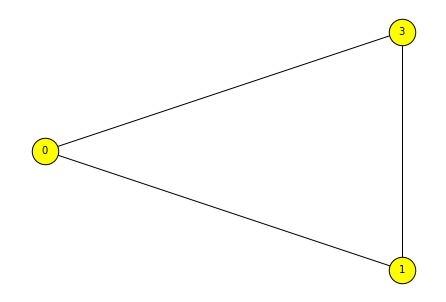

In [26]:
cycle = nx.find_cycle(G)
print(cycle)
nx.draw_shell(nx.Graph(cycle), **draw_options)

{(0, 1), (8, 3), (5, 6), (2, 4)}


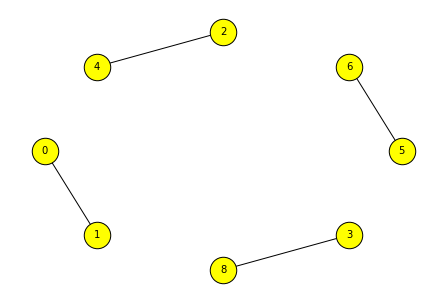

In [27]:
max_weight_matching = nx.max_weight_matching(G)
print(max_weight_matching)
nx.draw_shell(nx.Graph(max_weight_matching) , **draw_options)

## Bipartite graphs

There is no "bipartite graph" class in networkx; there are functions that treat a standard networkx.Graph as a bipartite graph.

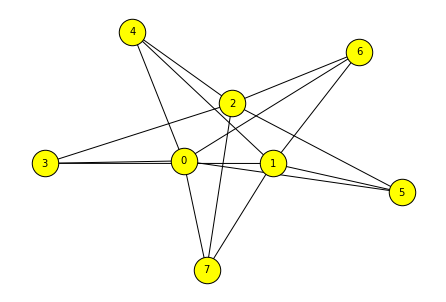

In [28]:
K_3_5 = nx.complete_bipartite_graph(3, 5)   # Returns the complete bipartite graph with sides of size 3 and 5.
nx.draw(K_3_5,  **draw_options)

left_nodes {0, 1, 2} right_nodes {3, 4, 5, 6, 7}


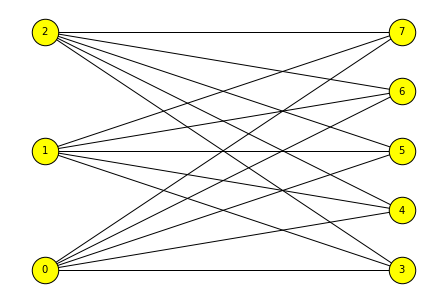

In [29]:
left_nodes, right_nodes = nx.bipartite.sets(K_3_5)
print("left_nodes",left_nodes,"right_nodes",right_nodes)
nx.draw(K_3_5,  **draw_options, pos=nx.bipartite_layout(K_3_5, left_nodes))


But there is a catch: how can the system know what are the two parts?

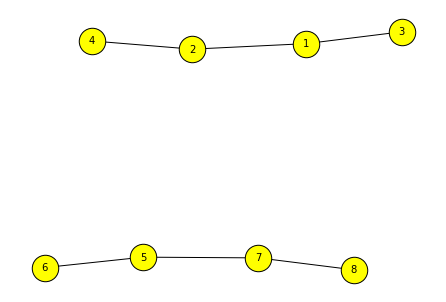

In [30]:
G = nx.Graph()
G.add_edges_from([(1,2),(1,3),(4,2), (5,6),(5,7),(8,7)])
nx.draw(G,  **draw_options)

In [31]:

left_nodes, right_nodes = nx.bipartite.sets(G) # Error: AmbiguousSolution
nx.draw(G,  **draw_options, pos=nx.bipartite_layout(G, left_nodes))  

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

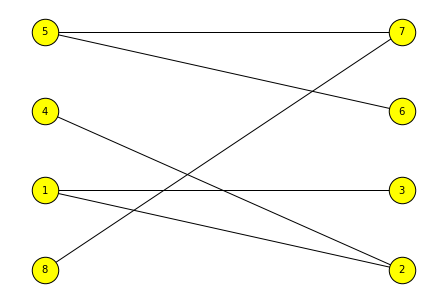

In [ ]:
# left_nodes, right_nodes = nx.bipartite.sets(G) # Error: AmbiguousSolution
left_nodes, right_nodes = [ [1,4,5,8], [2,3,6,7] ] 
nx.draw(G,  **draw_options, pos=nx.bipartite_layout(G, left_nodes))

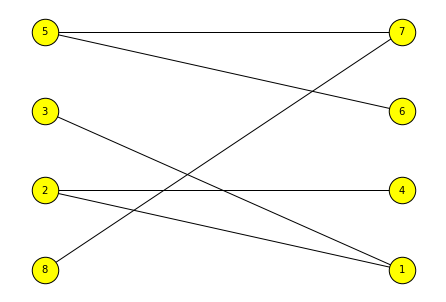

In [ ]:

left_nodes, right_nodes = [ [2,3,5,8], [1,4,6,7] ] 
nx.draw(G,  **draw_options, pos=nx.bipartite_layout(G, left_nodes))

{0: 3, 1: 4, 2: 5, 3: 0, 4: 1, 5: 2}


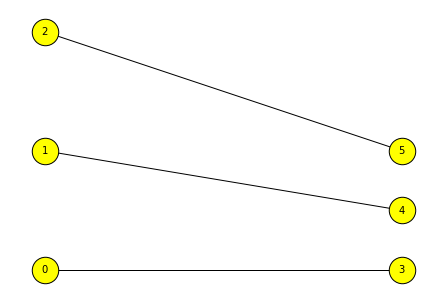

In [ ]:
max_matching = nx.bipartite.maximum_matching(K_3_5)
print(max_matching)
left_nodes, right_nodes = nx.bipartite.sets(K_3_5)
nx.draw(nx.Graph(max_matching.items()),  **draw_options, pos=nx.bipartite_layout(K_3_5, left_nodes))

In [ ]:
max_matching = nx.bipartite.maximum_matching(G) # Error: AmbiguousSolution

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

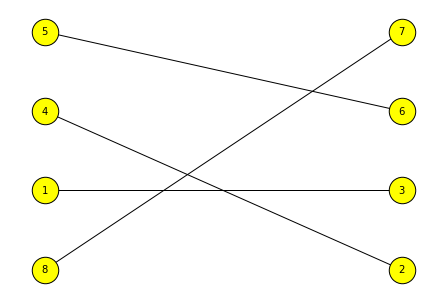

In [ ]:
left_nodes = [1,4,5,8]
max_matching = nx.bipartite.maximum_matching(G, left_nodes) 
nx.draw(nx.Graph(max_matching.items()),  **draw_options, pos=nx.bipartite_layout(G,left_nodes))

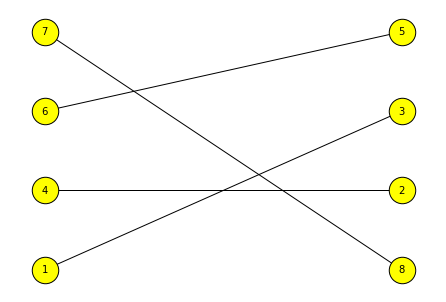

In [ ]:
left_nodes = [1,4,6,7]
max_matching = nx.bipartite.maximum_matching(G, left_nodes) 
nx.draw(nx.Graph(max_matching.items()),  **draw_options, pos=nx.bipartite_layout(G,left_nodes))

### Bipartite graph with weights

In [56]:
for e in G.edges:
	weight = np.random.randint(1,100)
	print(e, weight)
	G[e[0]][e[1]]["weight"]=G[e[1]][e[0]]["weight"]=weight

(1, 2) 14
(1, 3) 19
(2, 4) 53
(5, 6) 17
(5, 7) 3
(7, 8) 20


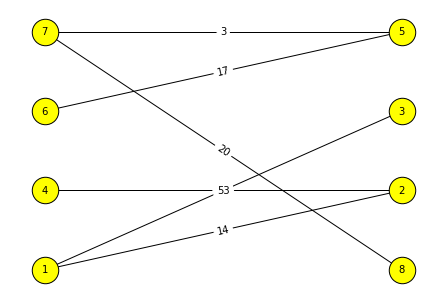

In [57]:
left_nodes = [1,4,6,7]
pos = nx.bipartite_layout(G, left_nodes)
nx.draw(G,  **draw_options, pos=pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G,'weight'));

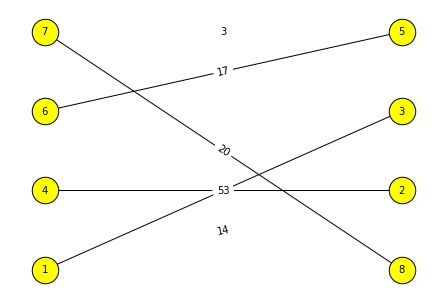

In [59]:
max_weight_matching = nx.max_weight_matching(G) 
max_weight_matching_graph = nx.Graph(max_weight_matching)
nx.draw(max_weight_matching_graph,  **draw_options, pos=pos)
nx.draw_networkx_edge_labels(max_weight_matching_graph, pos, edge_labels=nx.get_edge_attributes(G,'weight'));